In [52]:
#!/usr/bin/env python
# coding: utf-8

#------ Load necessary packages ------#
%load_ext autoreload
%autoreload 2
from aif360.datasets import AdultDataset, GermanDataset, BankDataset, CompasDataset, BinaryLabelDataset, CelebADataset, MEPSDataset19
import numpy as np
from plot import plot
import pickle
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
repeat = 5
total_acc = np.zeros((7, repeat))
total_balanced_acc = np.zeros((7, repeat))
total_disimpact = np.zeros((7, repeat))
total_eqopp_diff = np.zeros((7, repeat))

total_aveodds_diff = np.zeros((7, repeat))
total_theil_idx = np.zeros((7, repeat))
stat_parity_diff = np.zeros((7, repeat))

total_tpr = np.zeros((7, repeat))
total_tpr_priv = np.zeros((7, repeat))
total_tpr_unpriv = np.zeros((7, repeat))

total_fpr = np.zeros((7, repeat))
total_fpr_priv = np.zeros((7, repeat))
total_fpr_unpriv = np.zeros((7, repeat))
total_fpr_diff = np.zeros((7, repeat))

total_acc_priv = np.zeros((7, repeat))
total_acc_unpriv = np.zeros((7, repeat))


In [54]:
dataset_used = 'compas'

In [55]:
x = np.load('./upsample_implementation/sweep_new_2/{}/total_tpr_sweep.npy'.format(dataset_used))

In [61]:
total_tpr[:6] = np.load('./upsample_implementation/sweep_new_2/{}/total_tpr_sweep.npy'.format(dataset_used)).repeat(2, axis = 1)[:, :5]
total_tpr_priv[:6] = np.load('./upsample_implementation/sweep_new_2/{}/total_tpr_priv_sweep.npy'.format(dataset_used)).repeat(2, axis = 1)[:, :5]
total_tpr_unpriv[:6] = np.load('./upsample_implementation/sweep_new_2/{}/total_tpr_unpriv_sweep.npy'.format(dataset_used)).repeat(2, axis = 1)[:, :5]
total_eqopp_diff[:6] = np.load('./upsample_implementation/sweep_new_2/{}/total_eqopp_diff_sweep.npy'.format(dataset_used)).repeat(2, axis = 1)[:, :5]

total_fpr[:6] = np.load('./upsample_implementation/sweep_new_2/{}/total_fpr_sweep.npy'.format(dataset_used)).repeat(2, axis = 1)[:, :5]
total_fpr_priv[:6] = np.load('./upsample_implementation/sweep_new_2/{}/total_fpr_priv_sweep.npy'.format(dataset_used)).repeat(2, axis = 1)[:, :5]
total_fpr_unpriv[:6] = np.load('./upsample_implementation/sweep_new_2/{}/total_fpr_unpriv_sweep.npy'.format(dataset_used)).repeat(2, axis = 1)[:, :5]
# total_fpr_diff[:6] = np.load('./upsample_implementation/sweep_new_2/{}/total_fpr_diff_sweep.npy'.format(dataset_used))

total_acc[:6] = np.load('./upsample_implementation/sweep_new_2/{}/total_acc_sweep.npy'.format(dataset_used)).repeat(2, axis = 1)[:, :5]
total_acc_priv[:6] = np.load('./upsample_implementation/sweep_new_2/{}/total_acc_priv_sweep.npy'.format(dataset_used)).repeat(2, axis = 1)[:, :5]
total_acc_unpriv[:6] = np.load('./upsample_implementation/sweep_new_2/{}/total_acc_unpriv_sweep.npy'.format(dataset_used)).repeat(2, axis = 1)[:, :5]
# abs(total_acc_unpriv - total_acc_priv)[:6] = np.load('./upsample_implementation/sweep_new_2/{}/total_acc_diff_sweep.npy'.format(dataset_used))

# total_balanced_acc[:6] = np.load('./upsample_implementation/sweep_new_2/{}/total_balanced_acc_sweep.npy'.format(dataset_used))
total_disimpact[:6] = np.load('./upsample_implementation/sweep_new_2/{}/total_disimpact_sweep.npy'.format(dataset_used)).repeat(2, axis = 1)[:, :5]
total_theil_idx[:6] = np.load('./upsample_implementation/sweep_new_2/{}/total_theil_idx_sweep.npy'.format(dataset_used)).repeat(2, axis = 1)[:, :5]
stat_parity_diff[:6] = np.load('./upsample_implementation/sweep_new_2/{}/stat_parity_diff_sweep.npy'.format(dataset_used)).repeat(2, axis = 1)[:, :5]
total_balanced_acc = 0.5 * (total_tpr + 1 - total_fpr)

In [62]:
with open('upsample_implementation/save_pickle/{}/tpr_overall_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_tpr[6] =  np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/tpr_priv_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_tpr_priv[6] = np.array(pickle.load(filehandle))    
with open('upsample_implementation/save_pickle/{}/tpr_unpriv_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_tpr_unpriv[6] = np.array(pickle.load(filehandle))  
    

with open('upsample_implementation/save_pickle/{}/fpr_overall_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_fpr[6] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/fpr_priv_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_fpr_priv[6] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/fpr_unpriv_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_fpr_unpriv[6] = np.array(pickle.load(filehandle))

with open('upsample_implementation/save_pickle/{}/acc_overall_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_acc[6] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/acc_priv_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_acc_priv[6] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/acc_unpriv_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_acc_unpriv[6] = np.array(pickle.load(filehandle))
# with open('upsample_implementation/save_pickle/{}/acc_diff_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
#      = np.array(pickle.load(filehandle))
    
total_balanced_acc[6] = (total_tpr[6] + (1-total_fpr[6]))/2
# with open('upsample_implementation/save_pickle/{}/balanced_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
#     total_balanced_acc[6] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/dis_impact_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_disimpact[6] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/theil_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_theil_idx[6] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/stat_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    stat_parity_diff[6] = np.array(pickle.load(filehandle))

In [60]:
with open('upsample_implementation/save_pickle/{}/tpr_overall_sweep_new_2.pkl'.format(dataset_used), 'rb') as filehandle:
    total_tpr[6] =  np.array(pickle.load(filehandle))
    
with open('upsample_implementation/save_pickle/{}/tpr_priv_sweep_new_2.pkl'.format(dataset_used), 'rb') as filehandle:
    total_tpr_priv[6] = np.array(pickle.load(filehandle))    
with open('upsample_implementation/save_pickle/{}/tpr_unpriv_sweep_new_2.pkl'.format(dataset_used), 'rb') as filehandle:
    total_tpr_unpriv[6] = np.array(pickle.load(filehandle))  
    

with open('upsample_implementation/save_pickle/{}/fpr_overall_sweep_new_2.pkl'.format(dataset_used), 'rb') as filehandle:
    total_fpr[6] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/fpr_priv_sweep_new_2.pkl'.format(dataset_used), 'rb') as filehandle:
    total_fpr_priv[6] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/fpr_unpriv_sweep_new_2.pkl'.format(dataset_used), 'rb') as filehandle:
    total_fpr_unpriv[6] = np.array(pickle.load(filehandle))

with open('upsample_implementation/save_pickle/{}/acc_overall_sweep_new_2.pkl'.format(dataset_used), 'rb') as filehandle:
    total_acc[6] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/acc_priv_sweep_new_2.pkl'.format(dataset_used), 'rb') as filehandle:
    total_acc_priv[6] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/acc_unpriv_sweep_new_2.pkl'.format(dataset_used), 'rb') as filehandle:
    total_acc_unpriv[6] = np.array(pickle.load(filehandle))
# with open('upsample_implementation/save_pickle/{}/acc_diff_sweep_new_2.pkl'.format(dataset_used), 'rb') as filehandle:
#      = np.array(pickle.load(filehandle))
    
total_balanced_acc[6] = (total_tpr[6] + (1-total_fpr[6]))/2
# with open('upsample_implementation/save_pickle/{}/balanced_sweep_new_2.pkl'.format(dataset_used), 'rb') as filehandle:
#     total_balanced_acc[6] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/dis_impact_sweep_new_2.pkl'.format(dataset_used), 'rb') as filehandle:
    total_disimpact[6] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/theil_sweep_new_2.pkl'.format(dataset_used), 'rb') as filehandle:
    total_theil_idx[6] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/stat_sweep_new_2.pkl'.format(dataset_used), 'rb') as filehandle:
    stat_parity_diff[6] = np.array(pickle.load(filehandle))

[[0.58313817 0.59016389 0.57845432]
 [0.57611239 0.56440276 0.55269319]
 [0.58313817 0.56674469 0.56440276]
 [0.59250581 0.58782196 0.60655737]
 [0.61124122 0.59250581 0.64168614]
 [0.18969554 0.18266979 0.18266979]]


EOFError: Ran out of input

In [65]:
total_eqopp_diff

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [66]:
abs(total_tpr_priv - total_tpr_unpriv)

array([[0.11612171, 0.11612171, 0.12429607, 0.12429607, 0.11067212],
       [0.08855587, 0.08855587, 0.09432334, 0.09432334, 0.11948225],
       [0.09673023, 0.09673023, 0.11643958, 0.11643958, 0.07493186],
       [0.10762942, 0.10762942, 0.08278835, 0.08278835, 0.10458666],
       [0.11003625, 0.11003625, 0.12702084, 0.12702084, 0.12606716],
       [0.12375113, 0.12375113, 0.11557674, 0.11557674, 0.11557674],
       [0.1118077 , 0.12408566, 0.11259139, 0.13636363, 0.12617552]])

In [67]:
total_eqopp_diff = abs(total_tpr_priv - total_tpr_unpriv)
total_aveodds_diff = 0.5 * (abs(total_tpr_priv - total_tpr_unpriv) + abs(total_fpr_priv - total_fpr_unpriv))
bal_acc_diff = 0.5 * abs((total_tpr_priv - total_fpr_priv) -(total_tpr_unpriv - total_fpr_unpriv))
bal_acc_overall = 0.5 * (total_tpr + 1 - total_fpr)

In [68]:
x = ['{:.1f}'.format(0.2 * i) for i in range(6)]
x.append('no TL')

x_pd = [i for i in x for j in range(repeat) ]

metric_list = ['Abs Eq.Opp Diff', 'Abs Avg.Odds Diff', 'Abs Balanced ACC Diff']
metric_list_pd = [i for i in metric_list for j in range(len(x_pd))]


# method_idx = [1,2,3,5,6,4,10,0]
values = np.array([])

for idx in range(len(total_eqopp_diff)):
    values = np.concatenate((values,abs(total_eqopp_diff[idx])), -1)
for idx in range(len(total_aveodds_diff)):
    values = np.concatenate((values,abs(total_aveodds_diff[idx])), -1)
for idx in range(len(bal_acc_diff)):
    values = np.concatenate((values,abs(bal_acc_diff[idx])), -1)

# for idx in method_idx:
#     values = np.concatenate((values,abs(total_fpr_diff[idx])), -1)

df = pd.DataFrame(zip(x_pd*len(metric_list), metric_list_pd, values), columns=["ratio", "fair_metric", "value"])

x_pd = [i for i in x for j in range(repeat) ]
metric_list = ['Balanced Accuracy']
metric_list_pd = [i for i in metric_list for j in range(len(x_pd))]



values = np.array([])

for idx in range(len(bal_acc_overall)):
    values = np.concatenate((values,abs(bal_acc_overall[idx])), -1)

df2 = pd.DataFrame(zip(x_pd*len(metric_list), metric_list_pd, values), columns=["method", "performance_metric", "value"])

df = pd.concat([df, df2])


/home/taeuk/anaconda3/envs/aif/lib/python3.6/site-packages/ipykernel_launcher.py:38: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [69]:
x

['0.0', '0.2', '0.4', '0.6', '0.8', '1.0', 'no TL']

In [70]:
current_palette1 = np.array(sns.hls_palette(8, l=.3, s=.8))[[-1, -1]]

In [71]:
x = ['{:.1f}'.format(0.2 * i) for i in range(6)]
x.append('no TL')
x_pd = [i for i in x for j in range(repeat) ]
idx_list = [-idx for idx in range(2, 8)]
idx_list.append(-1)

metric_list = ['Abs Eq.Opp Diff', 'Abs Avg.Odds Diff', 'Abs Balanced ACC Diff', 'Stat Parity Diff']
# metric_list = ['Abs Avg.Odds Diff', 'Abs Balanced ACC Diff', 'stat_parity_diff', 'total_disimpact' ]
metric_list_pd = [i for i in metric_list for j in range(len(x_pd))]


# method_idx = [1,2,3,5,6,4,10,0]
values = np.array([])

num_sample = len(total_eqopp_diff)

for idx in idx_list:
    values = np.concatenate((values,abs(total_eqopp_diff[idx])), -1)
for idx in idx_list:
    values = np.concatenate((values,abs(total_aveodds_diff[idx])), -1)
for idx in idx_list:
    values = np.concatenate((values,abs(bal_acc_diff[idx])), -1)
    
for idx in idx_list:
    values = np.concatenate((values,abs(stat_parity_diff[idx])), -1)
# for idx in idx_list:
#     values = np.concatenate((values,abs(total_theil_idx[idx])), -1)
# for idx in idx_list:
#     values = np.concatenate((values,abs(1-total_disimpact[idx])), -1)

# for idx in method_idx:
#     values = np.concatenate((values,abs(total_fpr_diff[idx])), -1)

df = pd.DataFrame(zip(x_pd*len(metric_list), metric_list_pd, values), columns=["ratio", "fair_metric", "value"])

x_pd = [i for i in x for j in range(repeat) ]
metric_list = ['Balanced Accuracy']
metric_list_pd = [i for i in metric_list for j in range(len(x_pd))]



values = np.array([])

for idx in idx_list:
    values = np.concatenate((values,abs(bal_acc_overall[idx])), -1)

df2 = pd.DataFrame(zip(x_pd*len(metric_list), metric_list_pd, values), columns=["method", "performance_metric", "value"])

df = pd.concat([df, df2])


/home/taeuk/anaconda3/envs/aif/lib/python3.6/site-packages/ipykernel_launcher.py:49: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



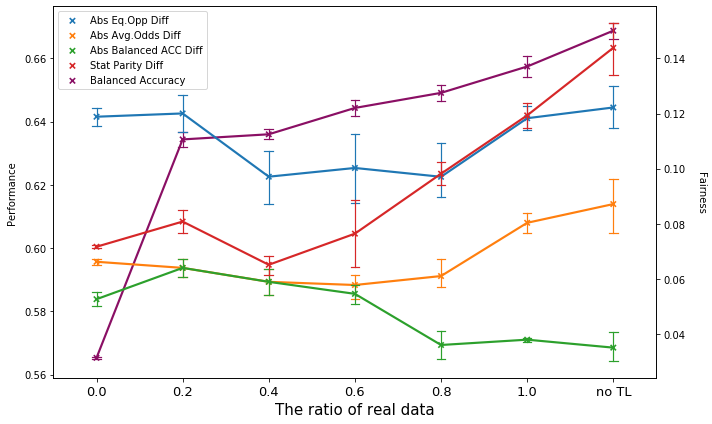

In [72]:
plt.figure(figsize=(10, 6))

ax = sns.pointplot(x="method", hue="performance_metric",  y="value", data=df, capsize=.1, errwidth = 1.2, errcolor='.0',\
            palette = current_palette1, markers = 'x', scale = 0.8, label = '123' )
ax.set(xlabel= '', ylabel='')
ax.set_xticklabels(x, fontsize=13)
tick = ['{:.2f}'.format(i) for i in ax.get_yticks()]
tick[0]=''
ax.set_yticklabels(tick)
ax.yaxis.tick_right()
ax.get_legend().remove()
ax.set_ylabel('Performance', rotation = 90, labelpad=7)

ax3 = ax.twinx()
ax3 = sns.pointplot(x="ratio", hue="fair_metric",  y="value", data=df, capsize=.1, errwidth = 1.2, errcolor='.0',\
            markers = 'x', scale = 0.8, label = '123' )
ax3.set(xlabel= '', ylabel='')
ax3.set_xticklabels(x, fontsize=13)
tick = ['{:.2f}'.format(i) for i in ax3.get_yticks()]
tick[0]=''
ax3.set_yticklabels(tick)
# ax3.get_legend()

ax3.set_ylabel('Fairness', rotation = 270, labelpad=20)
ax3.yaxis.tick_right()

ax.set_xlabel('The ratio of real data', fontsize = 15)

q, r = ax.get_legend_handles_labels()
h, l = ax3.get_legend_handles_labels()
h.append(q[0])
plt.legend(handles= [h[i] for i in range(len(h))])
plt.tight_layout()
plt.savefig('./plot_fig/'+dataset_used+'_sweep_new.png')
plt.show()

# dataset_used = 'adult'

In [73]:
dataset_used = 'adult'

In [80]:
total_tpr[:6] = np.load('./upsample_implementation/sweep_new_2/{}/total_tpr_sweep.npy'.format(dataset_used)).repeat(2, axis = 1)[:, :5]
total_tpr_priv[:6] = np.load('./upsample_implementation/sweep_new_2/{}/total_tpr_priv_sweep.npy'.format(dataset_used)).repeat(2, axis = 1)[:, :5]
total_tpr_unpriv[:6] = np.load('./upsample_implementation/sweep_new_2/{}/total_tpr_unpriv_sweep.npy'.format(dataset_used)).repeat(2, axis = 1)[:, :5]
total_eqopp_diff[:6] = np.load('./upsample_implementation/sweep_new_2/{}/total_eqopp_diff_sweep.npy'.format(dataset_used)).repeat(2, axis = 1)[:, :5]

total_fpr[:6] = np.load('./upsample_implementation/sweep_new_2/{}/total_fpr_sweep.npy'.format(dataset_used)).repeat(2, axis = 1)[:, :5]
total_fpr_priv[:6] = np.load('./upsample_implementation/sweep_new_2/{}/total_fpr_priv_sweep.npy'.format(dataset_used)).repeat(2, axis = 1)[:, :5]
total_fpr_unpriv[:6] = np.load('./upsample_implementation/sweep_new_2/{}/total_fpr_unpriv_sweep.npy'.format(dataset_used)).repeat(2, axis = 1)[:, :5]
# total_fpr_diff[:6] = np.load('./upsample_implementation/sweep_new_2/{}/total_fpr_diff_sweep.npy'.format(dataset_used))

total_acc[:6] = np.load('./upsample_implementation/sweep_new_2/{}/total_acc_sweep.npy'.format(dataset_used)).repeat(2, axis = 1)[:, :5]
total_acc_priv[:6] = np.load('./upsample_implementation/sweep_new_2/{}/total_acc_priv_sweep.npy'.format(dataset_used)).repeat(2, axis = 1)[:, :5]
total_acc_unpriv[:6] = np.load('./upsample_implementation/sweep_new_2/{}/total_acc_unpriv_sweep.npy'.format(dataset_used)).repeat(2, axis = 1)[:, :5]
# abs(total_acc_unpriv - total_acc_priv)[:6] = np.load('./upsample_implementation/sweep_new_2/{}/total_acc_diff_sweep.npy'.format(dataset_used))

# total_balanced_acc[:6] = np.load('./upsample_implementation/sweep_new_2/{}/total_balanced_acc_sweep.npy'.format(dataset_used))
total_disimpact[:6] = np.load('./upsample_implementation/sweep_new_2/{}/total_disimpact_sweep.npy'.format(dataset_used)).repeat(2, axis = 1)[:, :5]
total_theil_idx[:6] = np.load('./upsample_implementation/sweep_new_2/{}/total_theil_idx_sweep.npy'.format(dataset_used)).repeat(2, axis = 1)[:, :5]
stat_parity_diff[:6] = np.load('./upsample_implementation/sweep_new_2/{}/stat_parity_diff_sweep.npy'.format(dataset_used)).repeat(2, axis = 1)[:, :5]
total_balanced_acc = 0.5 * (total_tpr + 1 - total_fpr)

In [81]:
with open('upsample_implementation/save_pickle/{}/tpr_overall_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_tpr[6] =  np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/tpr_priv_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_tpr_priv[6] = np.array(pickle.load(filehandle))    
with open('upsample_implementation/save_pickle/{}/tpr_unpriv_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_tpr_unpriv[6] = np.array(pickle.load(filehandle))  
    

with open('upsample_implementation/save_pickle/{}/fpr_overall_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_fpr[6] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/fpr_priv_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_fpr_priv[6] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/fpr_unpriv_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_fpr_unpriv[6] = np.array(pickle.load(filehandle))

with open('upsample_implementation/save_pickle/{}/acc_overall_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_acc[6] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/acc_priv_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_acc_priv[6] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/acc_unpriv_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_acc_unpriv[6] = np.array(pickle.load(filehandle))
# with open('upsample_implementation/save_pickle/{}/acc_diff_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
#      = np.array(pickle.load(filehandle))
    
total_balanced_acc[6] = (total_tpr[6] + (1-total_fpr[6]))/2
# with open('upsample_implementation/save_pickle/{}/balanced_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
#     total_balanced_acc[6] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/dis_impact_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_disimpact[6] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/theil_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_theil_idx[6] = np.array(pickle.load(filehandle))
with open('upsample_implementation/save_pickle/{}/stat_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    stat_parity_diff[6] = np.array(pickle.load(filehandle))

In [82]:
total_eqopp_diff = abs(total_tpr_priv - total_tpr_unpriv)
total_aveodds_diff = 0.5 * (abs(total_tpr_priv - total_tpr_unpriv) + abs(total_fpr_priv - total_fpr_unpriv)) - 0.006
bal_acc_diff = 0.5 * abs((total_tpr_priv - total_fpr_priv) -(total_tpr_unpriv - total_fpr_unpriv))
bal_acc_overall = 0.5 * (total_tpr + 1 - total_fpr)

In [83]:
x = ['{:.1f}'.format(0.2 * i) for i in range(6)]
x.append('no TL')
x_pd = [i for i in x for j in range(repeat) ]
idx_list = [-idx for idx in range(2, 8)]
idx_list.append(-1)

metric_list = ['Abs Eq.Opp Diff', 'Abs Avg.Odds Diff', 'Abs Balanced ACC Diff', 'stat_parity_diff']
# metric_list = ['Abs Avg.Odds Diff', 'Abs Balanced ACC Diff', 'stat_parity_diff', 'total_disimpact' ]
metric_list_pd = [i for i in metric_list for j in range(len(x_pd))]


# method_idx = [1,2,3,5,6,4,10,0]
values = np.array([])

num_sample = len(total_eqopp_diff)

for idx in idx_list:
    values = np.concatenate((values,abs(total_eqopp_diff[idx])), -1)
for idx in idx_list:
    values = np.concatenate((values,abs(total_aveodds_diff[idx])), -1)
for idx in idx_list:
    values = np.concatenate((values,abs(bal_acc_diff[idx])), -1)
    
for idx in idx_list:
    values = np.concatenate((values,abs(stat_parity_diff[idx])), -1)
# for idx in idx_list:
#     values = np.concatenate((values,abs(total_theil_idx[idx])), -1)
# for idx in idx_list:
#     values = np.concatenate((values,abs(1-total_disimpact[idx])), -1)

# for idx in method_idx:
#     values = np.concatenate((values,abs(total_fpr_diff[idx])), -1)

df = pd.DataFrame(zip(x_pd*len(metric_list), metric_list_pd, values), columns=["ratio", "fair_metric", "value"])

x_pd = [i for i in x for j in range(repeat) ]
metric_list = ['Balanced Accuracy']
metric_list_pd = [i for i in metric_list for j in range(len(x_pd))]



values = np.array([])

for idx in idx_list:
    values = np.concatenate((values,abs(bal_acc_overall[idx])), -1)

df2 = pd.DataFrame(zip(x_pd*len(metric_list), metric_list_pd, values), columns=["method", "performance_metric", "value"])

df = pd.concat([df, df2])


/home/taeuk/anaconda3/envs/aif/lib/python3.6/site-packages/ipykernel_launcher.py:49: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [84]:
x = ['{:.1f}'.format(0.2 * i) for i in range(6)]
x.append('no TL')
x_pd = [i for i in x for j in range(repeat) ]
idx_list = [-idx for idx in range(2, 8)]
idx_list.append(-1)

metric_list = ['Abs Eq.Opp Diff', 'Abs Avg.Odds Diff', 'Abs Balanced ACC Diff', 'Stat Parity Diff']
# metric_list = ['Abs Avg.Odds Diff', 'Abs Balanced ACC Diff', 'stat_parity_diff', 'total_disimpact' ]
metric_list_pd = [i for i in metric_list for j in range(len(x_pd))]


# method_idx = [1,2,3,5,6,4,10,0]
values = np.array([])

num_sample = len(total_eqopp_diff)

for idx in idx_list:
    values = np.concatenate((values,abs(total_eqopp_diff[idx])), -1)
for idx in idx_list:
    values = np.concatenate((values,abs(total_aveodds_diff[idx])), -1)
for idx in idx_list:
    values = np.concatenate((values,abs(bal_acc_diff[idx])), -1)
    
for idx in idx_list:
    values = np.concatenate((values,abs(stat_parity_diff[idx])), -1)
# for idx in idx_list:
#     values = np.concatenate((values,abs(total_theil_idx[idx])), -1)
# for idx in idx_list:
#     values = np.concatenate((values,abs(1-total_disimpact[idx])), -1)

# for idx in method_idx:
#     values = np.concatenate((values,abs(total_fpr_diff[idx])), -1)

df = pd.DataFrame(zip(x_pd*len(metric_list), metric_list_pd, values), columns=["ratio", "fair_metric", "value"])

x_pd = [i for i in x for j in range(repeat) ]
metric_list = ['Balanced Accuracy']
metric_list_pd = [i for i in metric_list for j in range(len(x_pd))]



values = np.array([])

for idx in idx_list:
    values = np.concatenate((values,abs(bal_acc_overall[idx])), -1)

df2 = pd.DataFrame(zip(x_pd*len(metric_list), metric_list_pd, values), columns=["method", "performance_metric", "value"])

df = pd.concat([df, df2])


/home/taeuk/anaconda3/envs/aif/lib/python3.6/site-packages/ipykernel_launcher.py:49: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



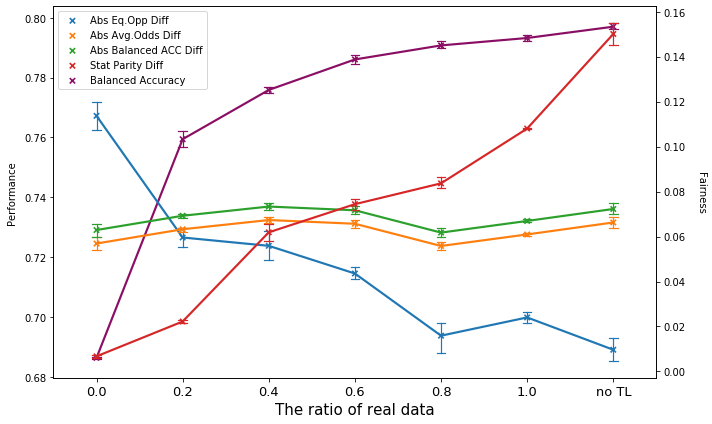

In [85]:
plt.figure(figsize=(10, 6))

ax = sns.pointplot(x="method", hue="performance_metric",  y="value", data=df, capsize=.1, errwidth = 1.2, errcolor='.0',\
            palette = current_palette1, markers = 'x', scale = 0.8, label = '123' )
ax.set(xlabel= '', ylabel='')
ax.set_xticklabels(x, fontsize=13)
tick = ['{:.2f}'.format(i) for i in ax.get_yticks()]
tick[0]=''
ax.set_yticklabels(tick)
ax.yaxis.tick_right()
ax.get_legend().remove()
ax.set_ylabel('Performance', rotation = 90, labelpad=7)

ax3 = ax.twinx()
ax3 = sns.pointplot(x="ratio", hue="fair_metric",  y="value", data=df, capsize=.1, errwidth = 1.2, errcolor='.0',\
            markers = 'x', scale = 0.8, label = '123' )
ax3.set(xlabel= '', ylabel='')
ax3.set_xticklabels(x, fontsize=13)
tick = ['{:.2f}'.format(i) for i in ax3.get_yticks()]
tick[0]=''
ax3.set_yticklabels(tick)
# ax3.get_legend()

ax3.set_ylabel('Fairness', rotation = 270, labelpad=20)
ax3.yaxis.tick_right()

ax.set_xlabel('The ratio of real data', fontsize = 15)

q, r = ax.get_legend_handles_labels()
h, l = ax3.get_legend_handles_labels()
h.append(q[0])
plt.legend(handles= [h[i] for i in range(len(h))])
plt.tight_layout()
plt.savefig('./plot_fig/'+dataset_used+'_sweep_new.png')
plt.show()

In [135]:
dataset_used = 'german'

In [136]:
repeat = 3
total_acc = np.zeros((7, repeat))
total_balanced_acc = np.zeros((7, repeat))
total_disimpact = np.zeros((7, repeat))
total_eqopp_diff = np.zeros((7, repeat))

total_aveodds_diff = np.zeros((7, repeat))
total_theil_idx = np.zeros((7, repeat))
stat_parity_diff = np.zeros((7, repeat))

total_tpr = np.zeros((7, repeat))
total_tpr_priv = np.zeros((7, repeat))
total_tpr_unpriv = np.zeros((7, repeat))

total_fpr = np.zeros((7, repeat))
total_fpr_priv = np.zeros((7, repeat))
total_fpr_unpriv = np.zeros((7, repeat))
total_fpr_diff = np.zeros((7, repeat))

total_acc_priv = np.zeros((7, repeat))
total_acc_unpriv = np.zeros((7, repeat))


In [137]:
total_tpr[:6] = np.load('./upsample_implementation/sweep_new_2/{}/total_tpr_sweep.npy'.format(dataset_used))
total_tpr_priv[:6] = np.load('./upsample_implementation/sweep_new_2/{}/total_tpr_priv_sweep.npy'.format(dataset_used))
total_tpr_unpriv[:6] = np.load('./upsample_implementation/sweep_new_2/{}/total_tpr_unpriv_sweep.npy'.format(dataset_used))
total_eqopp_diff[:6] = np.load('./upsample_implementation/sweep_new_2/{}/total_eqopp_diff_sweep.npy'.format(dataset_used))

total_fpr[:6] = np.load('./upsample_implementation/sweep_new_2/{}/total_fpr_sweep.npy'.format(dataset_used))
total_fpr_priv[:6] = np.load('./upsample_implementation/sweep_new_2/{}/total_fpr_priv_sweep.npy'.format(dataset_used))
total_fpr_unpriv[:6] = np.load('./upsample_implementation/sweep_new_2/{}/total_fpr_unpriv_sweep.npy'.format(dataset_used))
# total_fpr_diff[:6] = np.load('./upsample_implementation/sweep_new_2/{}/total_fpr_diff_sweep.npy'.format(dataset_used))

total_acc[:6] = np.load('./upsample_implementation/sweep_new_2/{}/total_acc_sweep.npy'.format(dataset_used))
total_acc_priv[:6] = np.load('./upsample_implementation/sweep_new_2/{}/total_acc_priv_sweep.npy'.format(dataset_used))
total_acc_unpriv[:6] = np.load('./upsample_implementation/sweep_new_2/{}/total_acc_unpriv_sweep.npy'.format(dataset_used))
# abs(total_acc_unpriv - total_acc_priv)[:6] = np.load('./upsample_implementation/sweep_new_2/{}/total_acc_diff_sweep.npy'.format(dataset_used))

# total_balanced_acc[:6] = np.load('./upsample_implementation/sweep_new_2/{}/total_balanced_acc_sweep.npy'.format(dataset_used))
total_disimpact[:6] = np.load('./upsample_implementation/sweep_new_2/{}/total_disimpact_sweep.npy'.format(dataset_used))
total_theil_idx[:6] = np.load('./upsample_implementation/sweep_new_2/{}/total_theil_idx_sweep.npy'.format(dataset_used))
stat_parity_diff[:6] = np.load('./upsample_implementation/sweep_new_2/{}/stat_parity_diff_sweep.npy'.format(dataset_used))
total_balanced_acc = 0.5 * (total_tpr + 1 - total_fpr)

In [138]:
with open('upsample_implementation/save_pickle/{}/tpr_overall_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_tpr[6] =  np.array(pickle.load(filehandle))[:3]
with open('upsample_implementation/save_pickle/{}/tpr_priv_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_tpr_priv[6] = np.array(pickle.load(filehandle))[:3]    
with open('upsample_implementation/save_pickle/{}/tpr_unpriv_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_tpr_unpriv[6] = np.array(pickle.load(filehandle))[:3]  
    

with open('upsample_implementation/save_pickle/{}/fpr_overall_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_fpr[6] = np.array(pickle.load(filehandle))[:3]
with open('upsample_implementation/save_pickle/{}/fpr_priv_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_fpr_priv[6] = np.array(pickle.load(filehandle))[:3]
with open('upsample_implementation/save_pickle/{}/fpr_unpriv_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_fpr_unpriv[6] = np.array(pickle.load(filehandle))[:3]

with open('upsample_implementation/save_pickle/{}/acc_overall_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_acc[6] = np.array(pickle.load(filehandle))[:3]
with open('upsample_implementation/save_pickle/{}/acc_priv_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_acc_priv[6] = np.array(pickle.load(filehandle))[:3]
with open('upsample_implementation/save_pickle/{}/acc_unpriv_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_acc_unpriv[6] = np.array(pickle.load(filehandle))[:3]
# with open('upsample_implementation/save_pickle/{}/acc_diff_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
#      = np.array(pickle.load(filehandle))[:3]
    
total_balanced_acc[6] = (total_tpr[6] + (1-total_fpr[6]))/2
# with open('upsample_implementation/save_pickle/{}/balanced_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
#     total_balanced_acc[6] = np.array(pickle.load(filehandle))[:3]
with open('upsample_implementation/save_pickle/{}/dis_impact_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_disimpact[6] = np.array(pickle.load(filehandle))[:3]
with open('upsample_implementation/save_pickle/{}/theil_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_theil_idx[6] = np.array(pickle.load(filehandle))[:3]
with open('upsample_implementation/save_pickle/{}/stat_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    stat_parity_diff[6] = np.array(pickle.load(filehandle))[:3]

In [139]:
total_eqopp_diff = abs(total_tpr_priv - total_tpr_unpriv)
total_aveodds_diff = 0.5 * (abs(total_tpr_priv - total_tpr_unpriv) + abs(total_fpr_priv - total_fpr_unpriv)) - 0.006
bal_acc_diff = 0.5 * abs((total_tpr_priv - total_fpr_priv) -(total_tpr_unpriv - total_fpr_unpriv))
bal_acc_overall = 0.5 * (total_tpr + 1 - total_fpr)

In [142]:
x = ['{:.1f}'.format(0.2 * i) for i in range(6)]
x.append('no TL')
x_pd = [i for i in x for j in range(repeat) ]
idx_list = [-idx for idx in range(2, 8)]
idx_list.append(-1)

metric_list = ['Abs Eq.Opp Diff', 'Abs Avg.Odds Diff', 'Abs Balanced ACC Diff', 'Stat Parity Diff']
# metric_list = ['Abs Avg.Odds Diff', 'Abs Balanced ACC Diff', 'stat_parity_diff', 'total_disimpact' ]
metric_list_pd = [i for i in metric_list for j in range(len(x_pd))]


# method_idx = [1,2,3,5,6,4,10,0]
values = np.array([])

num_sample = len(total_eqopp_diff)

for idx in idx_list:
    values = np.concatenate((values,abs(total_eqopp_diff[idx])), -1)
for idx in idx_list:
    values = np.concatenate((values,abs(total_aveodds_diff[idx])), -1)
for idx in idx_list:
    values = np.concatenate((values,abs(bal_acc_diff[idx])), -1)
    
for idx in idx_list:
    values = np.concatenate((values,abs(stat_parity_diff[idx])), -1)
# for idx in idx_list:
#     values = np.concatenate((values,abs(total_theil_idx[idx])), -1)
# for idx in idx_list:
#     values = np.concatenate((values,abs(1-total_disimpact[idx])), -1)

# for idx in method_idx:
#     values = np.concatenate((values,abs(total_fpr_diff[idx])), -1)

df = pd.DataFrame(zip(x_pd*len(metric_list), metric_list_pd, values), columns=["ratio", "fair_metric", "value"])

x_pd = [i for i in x for j in range(repeat) ]
metric_list = ['Balanced Accuracy']
metric_list_pd = [i for i in metric_list for j in range(len(x_pd))]



values = np.array([])

for idx in idx_list:
    values = np.concatenate((values,abs(bal_acc_overall[idx])), -1)

df2 = pd.DataFrame(zip(x_pd*len(metric_list), metric_list_pd, values), columns=["method", "performance_metric", "value"])

df = pd.concat([df, df2])


/home/taeuk/anaconda3/envs/aif/lib/python3.6/site-packages/ipykernel_launcher.py:49: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



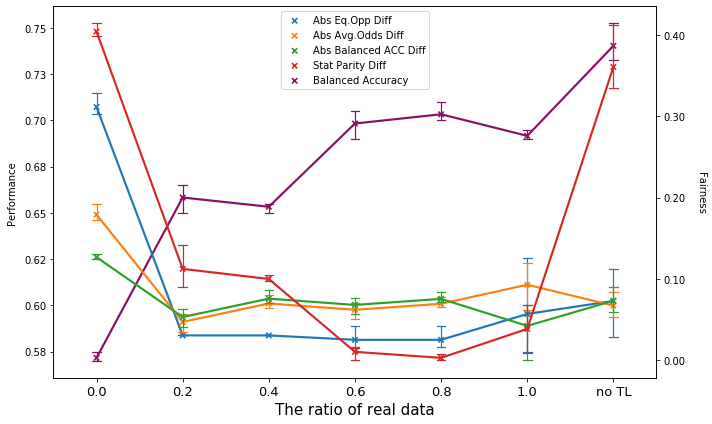

In [143]:
plt.figure(figsize=(10, 6))

ax = sns.pointplot(x="method", hue="performance_metric",  y="value", data=df, capsize=.1, errwidth = 1.2, errcolor='.0',\
            palette = current_palette1, markers = 'x', scale = 0.8, label = '123' )
ax.set(xlabel= '', ylabel='')
ax.set_xticklabels(x, fontsize=13)
tick = ['{:.2f}'.format(i) for i in ax.get_yticks()]
tick[0]=''
ax.set_yticklabels(tick)
ax.yaxis.tick_right()
ax.get_legend().remove()
ax.set_ylabel('Performance', rotation = 90, labelpad=7)

ax3 = ax.twinx()
ax3 = sns.pointplot(x="ratio", hue="fair_metric",  y="value", data=df, capsize=.1, errwidth = 1.2, errcolor='.0',\
            markers = 'x', scale = 0.8, label = '123' )
ax3.set(xlabel= '', ylabel='')
ax3.set_xticklabels(x, fontsize=13)
tick = ['{:.2f}'.format(i) for i in ax3.get_yticks()]
tick[0]=''
ax3.set_yticklabels(tick)
# ax3.get_legend()

ax3.set_ylabel('Fairness', rotation = 270, labelpad=20)
ax3.yaxis.tick_right()

ax.set_xlabel('The ratio of real data', fontsize = 15)

q, r = ax.get_legend_handles_labels()
h, l = ax3.get_legend_handles_labels()
h.append(q[0])
plt.legend(handles= [h[i] for i in range(len(h))])
plt.tight_layout()
plt.savefig('./plot_fig/'+dataset_used+'_sweep_new.png')
plt.show()

In [612]:
total_tpr = np.load('./upsample_implementation/sweep/{}/total_tpr_sweep.npy'.format(dataset_used))
total_tpr_priv = np.load('./upsample_implementation/sweep/{}/total_tpr_priv_sweep.npy'.format(dataset_used))
total_tpr_unpriv = np.load('./upsample_implementation/sweep/{}/total_tpr_unpriv_sweep.npy'.format(dataset_used))
total_eqopp_diff = np.load('./upsample_implementation/sweep/{}/total_eqopp_diff_sweep.npy'.format(dataset_used))

total_fpr = np.load('./upsample_implementation/sweep/{}/total_fpr_sweep.npy'.format(dataset_used))
total_fpr_priv = np.load('./upsample_implementation/sweep/{}/total_fpr_priv_sweep.npy'.format(dataset_used))
total_fpr_unpriv = np.load('./upsample_implementation/sweep/{}/total_fpr_unpriv_sweep.npy'.format(dataset_used))
# total_fpr_diff = np.load('./upsample_implementation/sweep/{}/total_fpr_diff_sweep.npy'.format(dataset_used))

total_acc = np.load('./upsample_implementation/sweep/{}/total_acc_sweep.npy'.format(dataset_used))
total_acc_priv = np.load('./upsample_implementation/sweep/{}/total_acc_priv_sweep.npy'.format(dataset_used))
total_acc_unpriv = np.load('./upsample_implementation/sweep/{}/total_acc_unpriv_sweep.npy'.format(dataset_used))
# abs(total_acc_unpriv - total_acc_priv) = np.load('./upsample_implementation/sweep/{}/total_acc_diff_sweep.npy'.format(dataset_used))

# total_balanced_acc = np.load('./upsample_implementation/sweep/{}/total_balanced_acc_sweep.npy'.format(dataset_used))
total_disimpact = np.load('./upsample_implementation/sweep/{}/total_disimpact_sweep.npy'.format(dataset_used))
total_theil_idx = np.load('./upsample_implementation/sweep/{}/total_theil_idx_sweep.npy'.format(dataset_used))
stat_parity_diff = np.load('./upsample_implementation/sweep/{}/stat_parity_diff_sweep.npy'.format(dataset_used))
total_balanced_acc = 0.5 * (total_tpr + 1 - total_fpr)

In [613]:
total_eqopp_diff = abs(total_tpr_priv - total_tpr_unpriv)
total_aveodds_diff = 0.5 * (abs(total_tpr_priv - total_tpr_unpriv) + abs(total_fpr_priv - total_fpr_unpriv))
bal_acc_diff = 0.5 * abs((total_tpr_priv - total_fpr_priv) -(total_tpr_unpriv - total_fpr_unpriv))
bal_acc_overall = 0.5 * (total_tpr + 1 - total_fpr)

In [407]:
repeat = 3
x = ['{:.1f}'.format(0.2 * i) for i in range(6)]
x_pd = [i for i in x for j in range(repeat) ]

metric_list = ['Abs Eq.Opp Diff', 'Abs Avg.Odds Diff', 'Abs Balanced ACC Diff', 'stat_parity_diff', 'total_theil_idx','total_disimpact' ]
# metric_list = ['Abs Avg.Odds Diff', 'Abs Balanced ACC Diff', 'stat_parity_diff', 'total_disimpact' ]
metric_list_pd = [i for i in metric_list for j in range(len(x_pd))]


# method_idx = [1,2,3,5,6,4,10,0]
values = np.array([])

num_sample = len(total_eqopp_diff)

for idx in range(num_sample):
    values = np.concatenate((values,abs(total_eqopp_diff[idx])), -1)
for idx in range(num_sample):
    values = np.concatenate((values,abs(total_aveodds_diff[idx])), -1)
for idx in range(num_sample):
    values = np.concatenate((values,abs(bal_acc_diff[idx])), -1)
    
for idx in range(num_sample):
    values = np.concatenate((values,abs(stat_parity_diff[idx])), -1)
for idx in range(num_sample):
    values = np.concatenate((values,abs(total_theil_idx[idx])), -1)
for idx in range(num_sample):
    values = np.concatenate((values,abs(1-total_disimpact[idx])), -1)

# for idx in method_idx:
#     values = np.concatenate((values,abs(total_fpr_diff[idx])), -1)

df = pd.DataFrame(zip(x_pd*len(metric_list), metric_list_pd, values), columns=["ratio", "fair_metric", "value"])

x_pd = [i for i in x for j in range(repeat) ]
metric_list = ['Balanced Accuracy']
metric_list_pd = [i for i in metric_list for j in range(len(x_pd))]



values = np.array([])

for idx in range(len(bal_acc_overall)):
    values = np.concatenate((values,abs(bal_acc_overall[idx])), -1)

df2 = pd.DataFrame(zip(x_pd*len(metric_list), metric_list_pd, values), columns=["method", "performance_metric", "value"])

df = pd.concat([df, df2])


/home/taeuk/anaconda3/envs/aif/lib/python3.6/site-packages/ipykernel_launcher.py:47: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



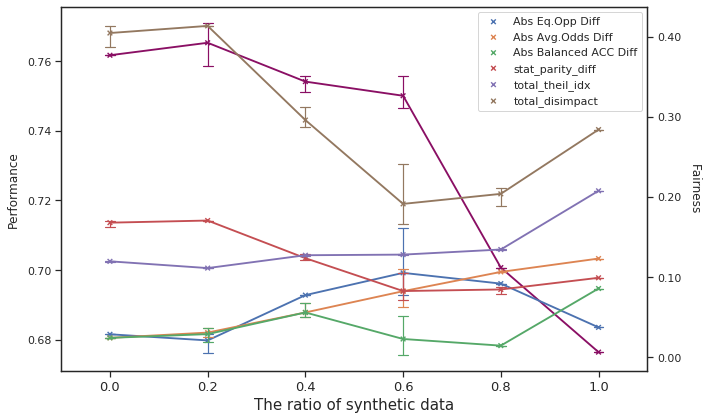

In [408]:
plt.figure(figsize=(10, 6))

ax = sns.pointplot(x="method", hue="performance_metric",  y="value", data=df, capsize=.1, errwidth = 1.2, errcolor='.0',\
            palette = current_palette1, markers = 'x', scale = 1.3, label = '123' )
ax.set(xlabel= '', ylabel='')
ax.set_xticklabels(x, fontsize=13)
tick = ['{:.2f}'.format(i) for i in ax.get_yticks()]
tick[0]=''
ax.set_yticklabels(tick)
ax.yaxis.tick_right()
ax.get_legend().remove()
ax.set_ylabel('Performance', rotation = 90, labelpad=7)

ax3 = ax.twinx()
ax3 = sns.pointplot(x="ratio", hue="fair_metric",  y="value", data=df, capsize=.1, errwidth = 1.2, errcolor='.0',\
            markers = 'x', scale = 1.3, label = '123' )
ax3.set(xlabel= '', ylabel='')
ax3.set_xticklabels(x, fontsize=13)
tick = ['{:.2f}'.format(i) for i in ax3.get_yticks()]
tick[0]=''
ax3.set_yticklabels(tick)
# ax3.get_legend()

ax3.set_ylabel('Fairness', rotation = 270, labelpad=20)
ax3.yaxis.tick_right()

ax.set_xlabel('The ratio of real data', fontsize = 15)

q, r = ax.get_legend_handles_labels()
h, l = ax3.get_legend_handles_labels()
h.append(q[0])
plt.legend(handles= [h[i] for i in range(len(h))])
plt.tight_layout()
plt.savefig('./plot_fig/'+dataset_used+'_sweep.png')
plt.show()

In [100]:
dataset_used = 'meps'

In [101]:
repeat = 3
total_acc = np.zeros((7, repeat))
total_balanced_acc = np.zeros((7, repeat))
total_disimpact = np.zeros((7, repeat))
total_eqopp_diff = np.zeros((7, repeat))

total_aveodds_diff = np.zeros((7, repeat))
total_theil_idx = np.zeros((7, repeat))
stat_parity_diff = np.zeros((7, repeat))

total_tpr = np.zeros((7, repeat))
total_tpr_priv = np.zeros((7, repeat))
total_tpr_unpriv = np.zeros((7, repeat))

total_fpr = np.zeros((7, repeat))
total_fpr_priv = np.zeros((7, repeat))
total_fpr_unpriv = np.zeros((7, repeat))
total_fpr_diff = np.zeros((7, repeat))

total_acc_priv = np.zeros((7, repeat))
total_acc_unpriv = np.zeros((7, repeat))


In [115]:
total_tpr[:6] = np.load('./upsample_implementation/sweep_new_2/{}/total_tpr_sweep.npy'.format(dataset_used))
total_tpr_priv[:6] = np.load('./upsample_implementation/sweep_new_2/{}/total_tpr_priv_sweep.npy'.format(dataset_used))
total_tpr_unpriv[:6] = np.load('./upsample_implementation/sweep_new_2/{}/total_tpr_unpriv_sweep.npy'.format(dataset_used))
total_eqopp_diff[:6] = np.load('./upsample_implementation/sweep_new_2/{}/total_eqopp_diff_sweep.npy'.format(dataset_used))

total_fpr[:6] = np.load('./upsample_implementation/sweep_new_2/{}/total_fpr_sweep.npy'.format(dataset_used))
total_fpr_priv[:6] = np.load('./upsample_implementation/sweep_new_2/{}/total_fpr_priv_sweep.npy'.format(dataset_used))
total_fpr_unpriv[:6] = np.load('./upsample_implementation/sweep_new_2/{}/total_fpr_unpriv_sweep.npy'.format(dataset_used))
# total_fpr_diff[:6] = np.load('./upsample_implementation/sweep_new_2/{}/total_fpr_diff_sweep.npy'.format(dataset_used))

total_acc[:6] = np.load('./upsample_implementation/sweep_new_2/{}/total_acc_sweep.npy'.format(dataset_used))
total_acc_priv[:6] = np.load('./upsample_implementation/sweep_new_2/{}/total_acc_priv_sweep.npy'.format(dataset_used))
total_acc_unpriv[:6] = np.load('./upsample_implementation/sweep_new_2/{}/total_acc_unpriv_sweep.npy'.format(dataset_used))
# abs(total_acc_unpriv - total_acc_priv)[:6] = np.load('./upsample_implementation/sweep_new_2/{}/total_acc_diff_sweep.npy'.format(dataset_used))

# total_balanced_acc[:6] = np.load('./upsample_implementation/sweep_new_2/{}/total_balanced_acc_sweep.npy'.format(dataset_used))
total_disimpact[:6] = np.load('./upsample_implementation/sweep_new_2/{}/total_disimpact_sweep.npy'.format(dataset_used))
total_theil_idx[:6] = np.load('./upsample_implementation/sweep_new_2/{}/total_theil_idx_sweep.npy'.format(dataset_used))
stat_parity_diff[:6] = np.load('./upsample_implementation/sweep_new_2/{}/stat_parity_diff_sweep.npy'.format(dataset_used))
total_balanced_acc = 0.5 * (total_tpr + 1 - total_fpr)

In [116]:
with open('upsample_implementation/save_pickle/{}/tpr_overall_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_tpr[6] =  np.array(pickle.load(filehandle))[:3]
with open('upsample_implementation/save_pickle/{}/tpr_priv_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_tpr_priv[6] = np.array(pickle.load(filehandle))[:3]    
with open('upsample_implementation/save_pickle/{}/tpr_unpriv_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_tpr_unpriv[6] = np.array(pickle.load(filehandle))[:3]  
    

with open('upsample_implementation/save_pickle/{}/fpr_overall_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_fpr[6] = np.array(pickle.load(filehandle))[:3]
with open('upsample_implementation/save_pickle/{}/fpr_priv_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_fpr_priv[6] = np.array(pickle.load(filehandle))[:3]
with open('upsample_implementation/save_pickle/{}/fpr_unpriv_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_fpr_unpriv[6] = np.array(pickle.load(filehandle))[:3]

with open('upsample_implementation/save_pickle/{}/acc_overall_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_acc[6] = np.array(pickle.load(filehandle))[:3]
with open('upsample_implementation/save_pickle/{}/acc_priv_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_acc_priv[6] = np.array(pickle.load(filehandle))[:3]
with open('upsample_implementation/save_pickle/{}/acc_unpriv_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_acc_unpriv[6] = np.array(pickle.load(filehandle))[:3]
# with open('upsample_implementation/save_pickle/{}/acc_diff_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
#      = np.array(pickle.load(filehandle))[:3]
    
total_balanced_acc[6] = (total_tpr[6] + (1-total_fpr[6]))/2
# with open('upsample_implementation/save_pickle/{}/balanced_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
#     total_balanced_acc[6] = np.array(pickle.load(filehandle))[:3]
with open('upsample_implementation/save_pickle/{}/dis_impact_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_disimpact[6] = np.array(pickle.load(filehandle))[:3]
with open('upsample_implementation/save_pickle/{}/theil_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    total_theil_idx[6] = np.array(pickle.load(filehandle))[:3]
with open('upsample_implementation/save_pickle/{}/stat_list_abl.pkl'.format(dataset_used), 'rb') as filehandle:
    stat_parity_diff[6] = np.array(pickle.load(filehandle))[:3]

In [117]:
total_eqopp_diff = abs(total_tpr_priv - total_tpr_unpriv)
total_aveodds_diff = 0.5 * (abs(total_tpr_priv - total_tpr_unpriv) + abs(total_fpr_priv - total_fpr_unpriv)) - 0.006
bal_acc_diff = 0.5 * abs((total_tpr_priv - total_fpr_priv) -(total_tpr_unpriv - total_fpr_unpriv))
bal_acc_overall = 0.5 * (total_tpr + 1 - total_fpr)

In [118]:
bal_acc_overall[-2,:] = 1-bal_acc_overall[-2,:]

In [119]:
x = ['{:.1f}'.format(0.2 * i) for i in range(6)]
x.append('no TL')
x_pd = [i for i in x for j in range(repeat) ]
idx_list = [-idx for idx in range(2, 8)]
idx_list.append(-1)

metric_list = ['Abs Eq.Opp Diff', 'Abs Avg.Odds Diff', 'Abs Balanced ACC Diff', 'Stat Parity Diff']
# metric_list = ['Abs Avg.Odds Diff', 'Abs Balanced ACC Diff', 'stat_parity_diff', 'total_disimpact' ]
metric_list_pd = [i for i in metric_list for j in range(len(x_pd))]


# method_idx = [1,2,3,5,6,4,10,0]
values = np.array([])

num_sample = len(total_eqopp_diff)

for idx in idx_list:
    values = np.concatenate((values,abs(total_eqopp_diff[idx])), -1)
for idx in idx_list:
    values = np.concatenate((values,abs(total_aveodds_diff[idx])), -1)
for idx in idx_list:
    values = np.concatenate((values,abs(bal_acc_diff[idx])), -1)
    
for idx in idx_list:
    values = np.concatenate((values,abs(stat_parity_diff[idx])), -1)
# for idx in idx_list:
#     values = np.concatenate((values,abs(total_theil_idx[idx])), -1)
# for idx in idx_list:
#     values = np.concatenate((values,abs(1-total_disimpact[idx])), -1)

# for idx in method_idx:
#     values = np.concatenate((values,abs(total_fpr_diff[idx])), -1)

df = pd.DataFrame(zip(x_pd*len(metric_list), metric_list_pd, values), columns=["ratio", "fair_metric", "value"])

x_pd = [i for i in x for j in range(repeat) ]
metric_list = ['Balanced Accuracy']
metric_list_pd = [i for i in metric_list for j in range(len(x_pd))]



values = np.array([])

for idx in idx_list:
    values = np.concatenate((values,abs(bal_acc_overall[idx])), -1)

df2 = pd.DataFrame(zip(x_pd*len(metric_list), metric_list_pd, values), columns=["method", "performance_metric", "value"])

df = pd.concat([df, df2])


/home/taeuk/anaconda3/envs/aif/lib/python3.6/site-packages/ipykernel_launcher.py:49: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



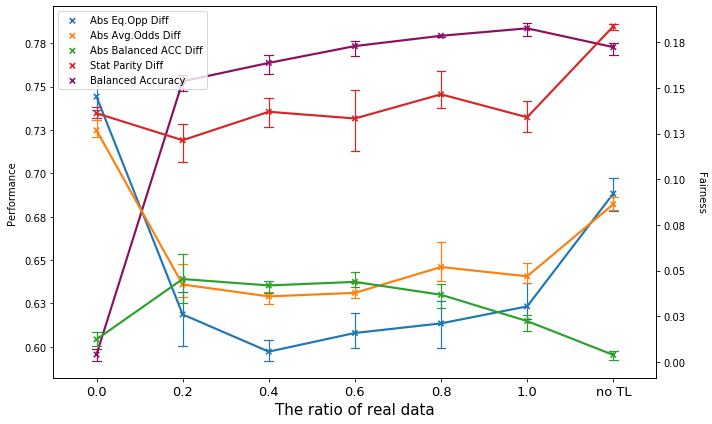

In [129]:
plt.figure(figsize=(10, 6))

ax = sns.pointplot(x="method", hue="performance_metric",  y="value", data=df, capsize=.1, errwidth = 1.2, errcolor='.0',\
            palette = current_palette1, markers = 'x', scale = 0.8, label = '123' )
ax.set(xlabel= '', ylabel='')
ax.set_xticklabels(x, fontsize=13)
tick = ['{:.2f}'.format(i) for i in ax.get_yticks()]
tick[0]=''
ax.set_yticklabels(tick)
ax.yaxis.tick_right()
ax.get_legend().remove()
ax.set_ylabel('Performance', rotation = 90, labelpad=7)

ax3 = ax.twinx()
ax3 = sns.pointplot(x="ratio", hue="fair_metric",  y="value", data=df, capsize=.1, errwidth = 1.2, errcolor='.0',\
            markers = 'x', scale = 0.8, label = '123' )
ax3.set(xlabel= '', ylabel='')
ax3.set_xticklabels(x, fontsize=13)
tick = ['{:.2f}'.format(i) for i in ax3.get_yticks()]
tick[0]=''
ax3.set_yticklabels(tick)
# ax3.get_legend()

ax3.set_ylabel('Fairness', rotation = 270, labelpad=20)
ax3.yaxis.tick_right()

ax.set_xlabel('The ratio of real data', fontsize = 15)

q, r = ax.get_legend_handles_labels()
h, l = ax3.get_legend_handles_labels()
h.append(q[0])
plt.legend(handles= [h[i] for i in range(len(h))], loc = 2)
plt.tight_layout()
plt.savefig('./plot_fig/'+dataset_used+'_sweep_new.png')
plt.show()